# Why Civil Resistance Works

> Konstantinos Mpouros <br>
> AM: 8170085 <br>
> Year: 2023 - 2024 <br>

## 1. About the project
---

**Project Summary:**

>This project, undertaken as part of the Applied Machine Learning course, delves into an exploration of historical trends and insights within civil resistance. Focusing specifically on the resistance campaigns spanning the years 1946 to 2014, the project seeks to uncover key insights and patterns embedded in the dynamics of these influential movements that answer the questions/instructions that has been given from the file "wcrw_v2.ipynd".

**NAVCO Dataset:** <br>
The first dataset encompasses columns such as 'PARTICIPATION,' 'CAMPAIGN,' and 'SUCCESS,' providing a comprehensive overview of historical resistance campaigns. Derived from the Nonviolent and Violent Campaigns and Outcomes (NAVCO) dataset, it includes unique identifiers, campaign names, and success indicators. Noteworthy features encompass campaign location, start and end years, primary targets, and various binary indicators representing success, failure, and specific campaign characteristics. With a focus on campaigns from 1946 to 2014, the dataset offers a nuanced exploration of the dynamics, outcomes, and attributes of significant civil resistance movements during this period.

**Polity5 Dataset:** <br>
The second dataset features columns like 'year,' 'country,' 'polity,' and 'regtrans,' offering a comprehensive perspective on attributes related to political and regime transitions. Country codes, political scores ('polity' and 'polity2'), and various binary indicators provide insights into political systems, exchange rate regimes, and events such as regime transitions. With information spanning specific years, countries, and political attributes, this dataset contributes to the understanding of political dynamics, the durability of regimes, and factors influencing political change. The inclusion of precise event details, such as months and days, adds granularity to the exploration of political events and transitions.


* You can find the datasets in this links: [[1]](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX), [[2]](https://www.systemicpeace.org/inscrdata.html)

## 2. Data Loading and Libraries
---

In [1]:
# Data Manipulation and Normalization
import pandas as pd
import numpy as np
import math

# Visualization
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Visualization for the table
from IPython.display import Markdown
from tabulate import tabulate
from prettytable import PrettyTable
from colorama import Fore, Style

# Logistic Regression
from statsmodels.api import Logit

# Model metrics and correlations
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import spearmanr, kendalltau, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
navco = pd.read_csv('Datasets/NAVCO 1.2 Updated.tab', delimiter='\t')
navco.head()

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0


In [3]:
p5v = pd.read_excel('Datasets/p5v2018.xls')
p5v.head()

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data cleaning and Data understanding

### Navco Dataset

In [4]:
navco.head()

,NAVCOID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
0,4.0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0
1,3.0,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0
2,218.0,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0
3,217.0,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0
4,5.0,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0


In [5]:
navco.columns

Index(['NAVCOID', 'CAMPAIGN', 'LOCATION', 'BYEAR', 'EYEAR', 'TARGET',
       'SUCCESS', 'LIMITED', 'FAILURE', 'ONGOING', 'NONVIOL', 'VIOL',
       'REGCHANGE', 'FSELFDET', 'SECESSION', 'OTHER', 'DURATION',
       'PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'REGVIOL', 'DEFECT',
       'VIOLENTFLANK', 'VIOLSIM', 'REGAID', 'STATESUP'],
      dtype='object')

> Columns like the id are no needed in the analysis we will do

In [6]:
navco.drop(['NAVCOID'], axis=1, inplace=True)

In [7]:
navco.describe()

,BYEAR,EYEAR,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.800000e+02,389.000000,389.000000,389.000000,177.000000,388.000000,389.000000,389.000000
mean,1983.218509,1988.946015,0.385604,0.113111,0.501285,0.095116,0.434447,0.565553,0.691517,0.133676,0.154242,0.020566,2142.172237,1.692959e+05,0.010449,0.904884,0.272494,0.327684,0.389175,0.339332,0.269923
std,19.447552,19.702678,0.487365,0.317136,0.500642,0.293752,0.496323,0.496323,0.462462,0.340742,0.361645,0.142107,3269.967566,8.904774e+05,0.039073,0.293752,0.445816,0.470700,0.488193,0.474092,0.444491
min,1945.000000,1946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1968.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.000000,4.725000e+03,0.000249,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1987.000000,1991.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,925.000000,1.500000e+04,0.001183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1999.000000,2006.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2522.000000,7.075000e+04,0.005183,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2013.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22875.000000,1.400000e+07,0.450129,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Column types seems very good, no transformation is needed

In [8]:
navco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CAMPAIGN                        389 non-null    object 
 1   LOCATION                        389 non-null    object 
 2   BYEAR                           389 non-null    float64
 3   EYEAR                           389 non-null    float64
 4   TARGET                          389 non-null    object 
 5   SUCCESS                         389 non-null    float64
 6   LIMITED                         389 non-null    float64
 7   FAILURE                         389 non-null    float64
 8   ONGOING                         389 non-null    float64
 9   NONVIOL                         389 non-null    float64
 10  VIOL                            389 non-null    float64
 11  REGCHANGE                       389 non-null    float64
 12  FSELFDET                        389 

> Non binary numeric columns distribution

In [9]:
non_binary_columns = [
    col for col in navco.columns
    if navco[col].nunique() > 2 and pd.api.types.is_float_dtype(navco[col])
]
non_binary_columns

['BYEAR',
 'EYEAR',
 'DURATION',
 'PARTICIPATION',
 'PERCENTAGEPOPULARPARTICIPATION']

> The outliers that appears in the boxplots can not be considered as actuall outlier so we wont remove them.

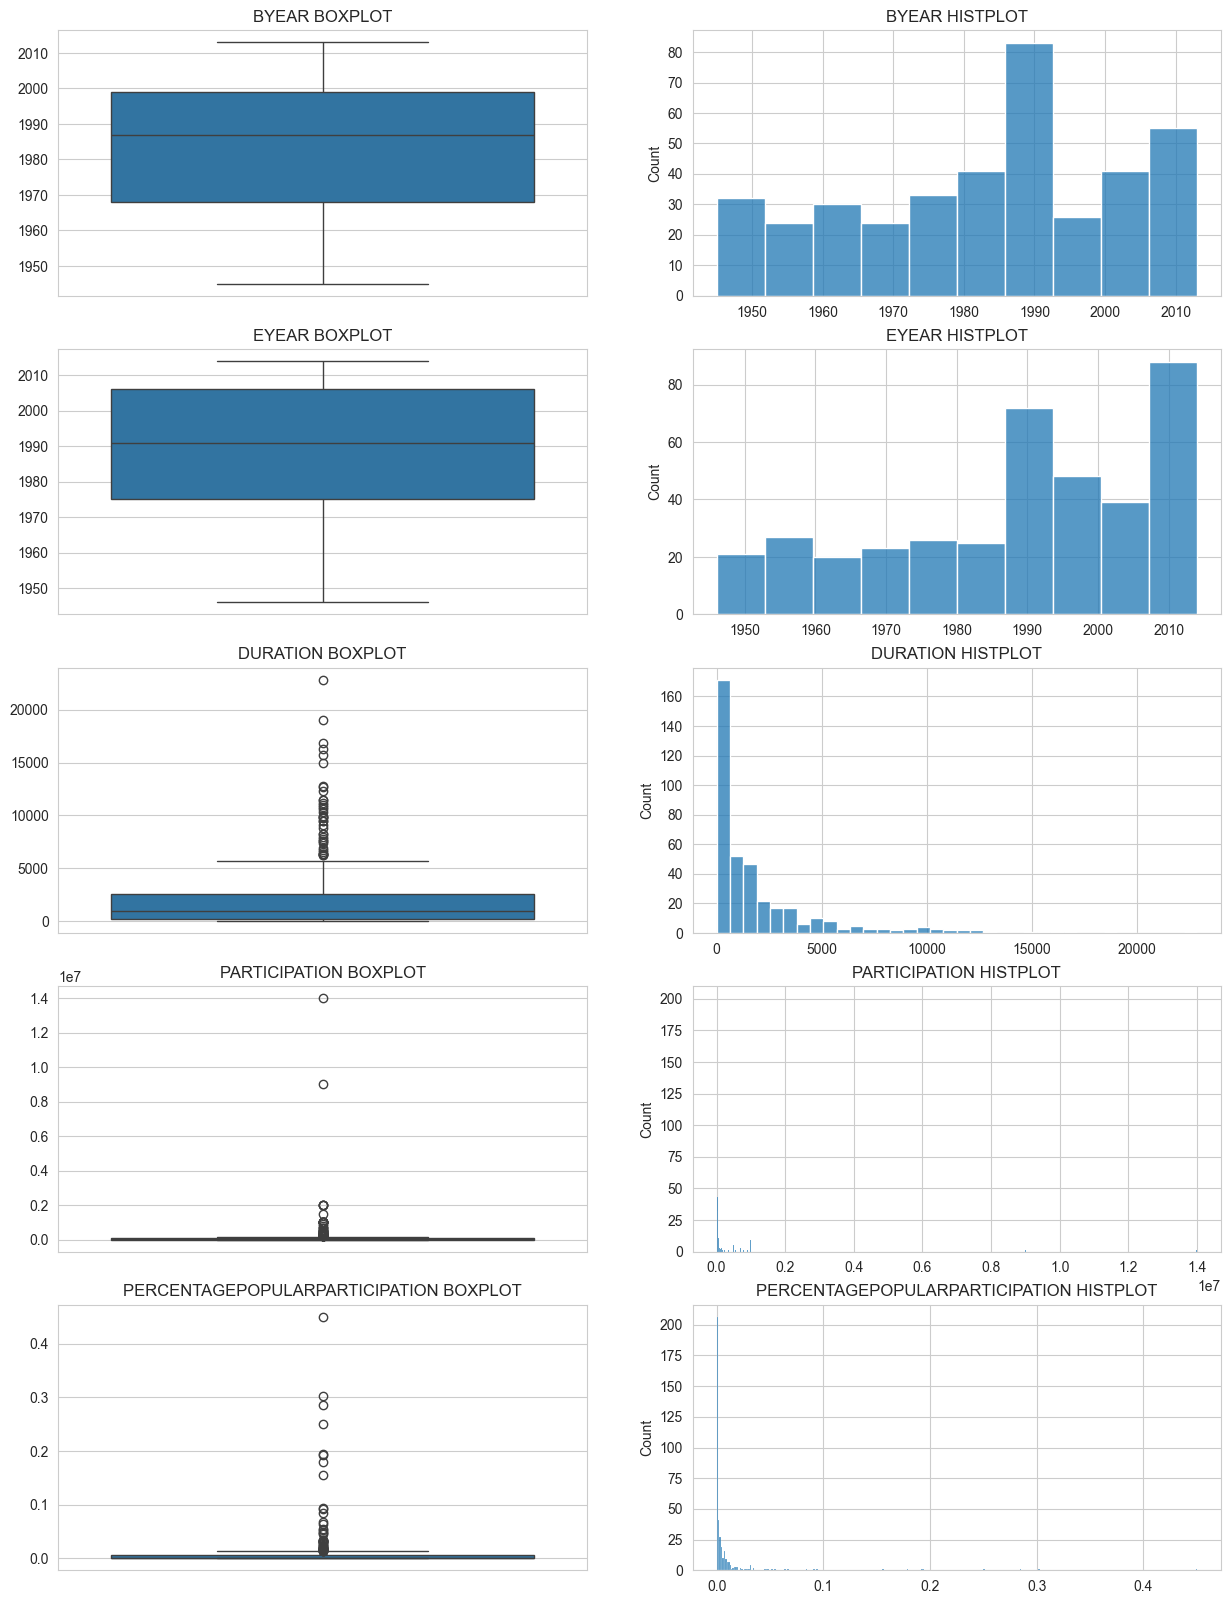

In [10]:
fig, axs = plt.subplots(len(non_binary_columns), 2, figsize=(15, 20))

for count, col in enumerate(non_binary_columns):
    sns.boxplot(navco[col], ax=axs[count, 0])
    axs[count, 0].set_title(col + ' BOXPLOT')
    axs[count, 0].set_ylabel(None)
    
    sns.histplot(navco[col], ax=axs[count, 1])
    axs[count, 1].set_title(col + ' HISTPLOT')
    axs[count, 1].set_xlabel(None)

plt.savefig('Graphs/navco_var_distrib1.png')
plt.show()

> Categorical columns top values

In [11]:
category_columns = [ col for col in navco.columns if pd.api.types.is_object_dtype(navco[col])]
category_columns

['CAMPAIGN', 'LOCATION', 'TARGET']

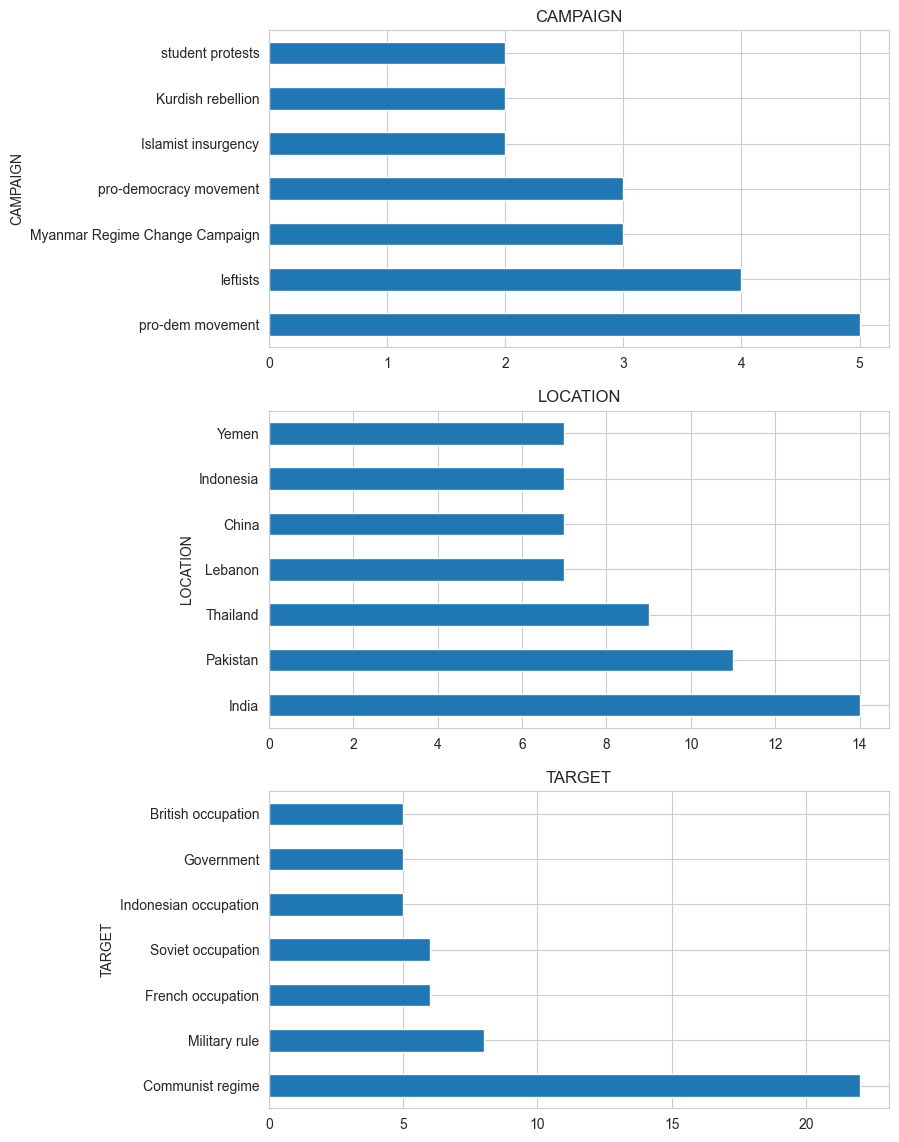

In [12]:
fig, axs = plt.subplots(len(category_columns), 1, figsize=(8, 14))

for count, col in enumerate(category_columns):
    navco[col].value_counts().sort_values(ascending=False).head(7).plot(kind='barh', ax=axs[count])
    axs[count].set_title(col)

plt.savefig('Graphs/navco_var_distrib2.png')
plt.show()

> Binary columns distribution

In [13]:
binary_cols = [
    col for col in navco.columns
    if navco[col].nunique() == 2 and pd.api.types.is_float_dtype(navco[col])
]
binary_cols

['SUCCESS',
 'LIMITED',
 'FAILURE',
 'ONGOING',
 'NONVIOL',
 'VIOL',
 'REGCHANGE',
 'FSELFDET',
 'SECESSION',
 'OTHER',
 'REGVIOL',
 'DEFECT',
 'VIOLENTFLANK',
 'VIOLSIM',
 'REGAID',
 'STATESUP']

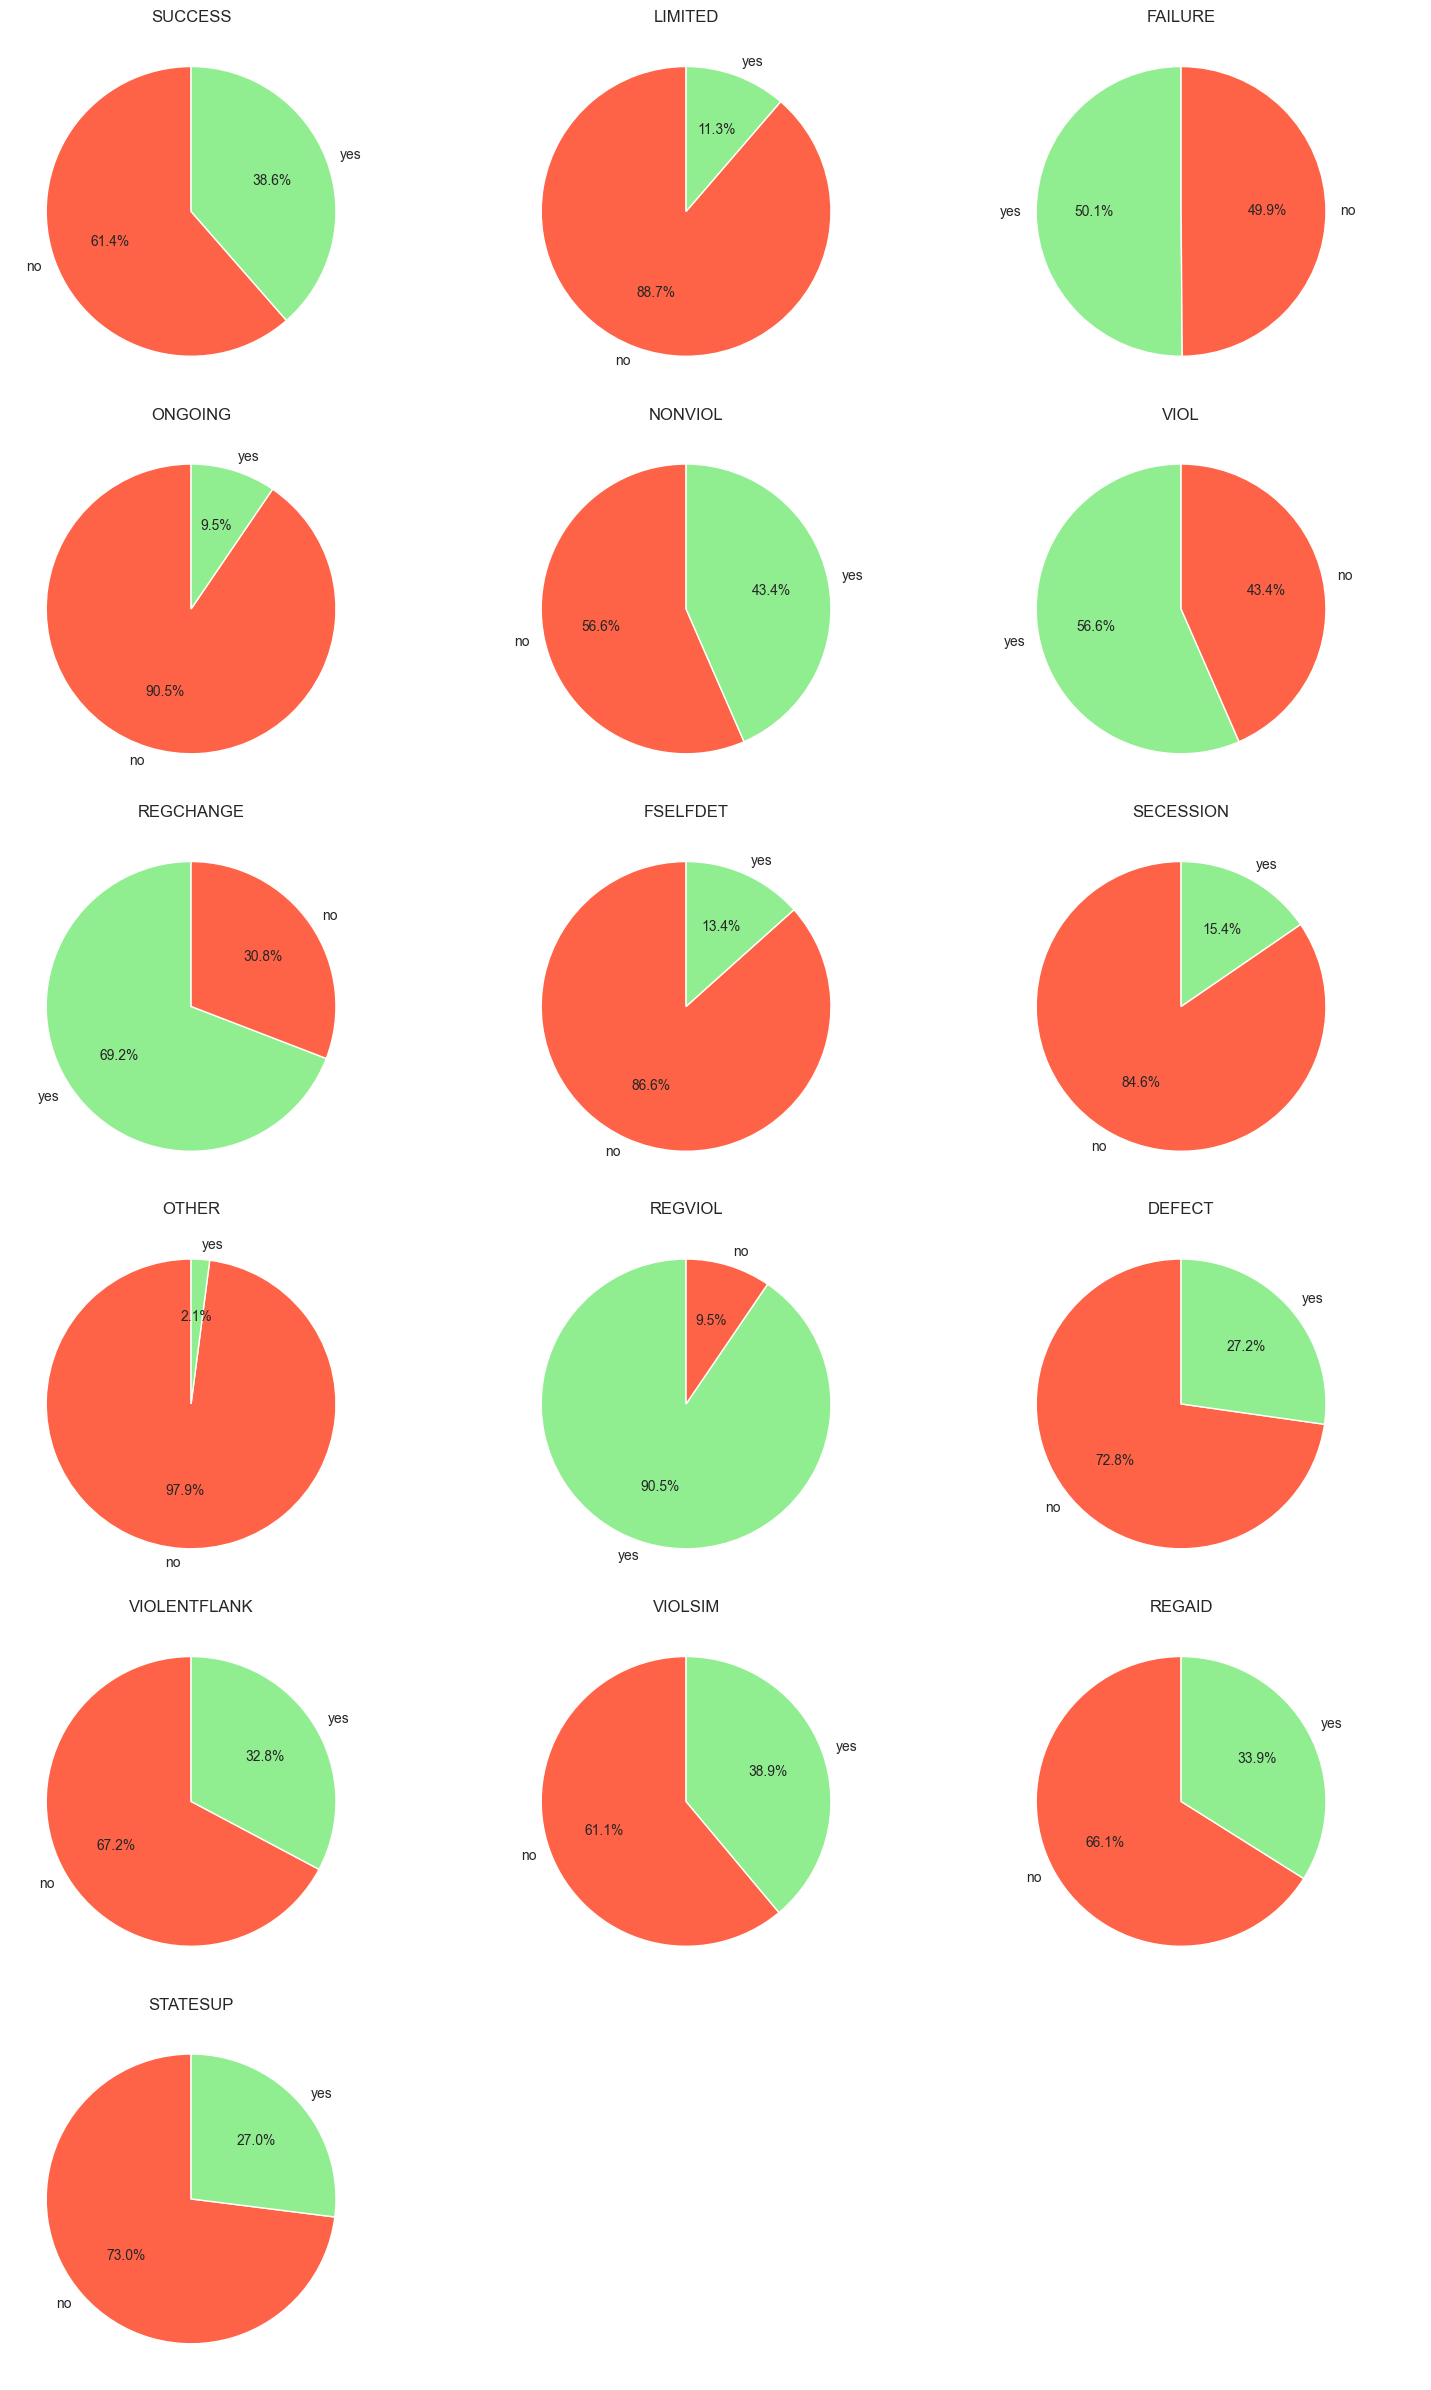

In [14]:
# Number of rows needed to present every time 3 pies
num_rows = math.ceil(len(binary_cols) / 3)

# Create subplots with 3 columns and the calculated number of rows
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for count, col in enumerate(binary_cols):
    # Extract the column we will represent and replace 0 with no and 1 with yes
    data = navco[col].value_counts().copy()
    data.index = data.index.map(lambda x: 'yes' if x == 1 else 'no')
    
    # Specify colors for each category
    category_colors = {'yes': 'lightgreen', 'no': 'tomato'}
    
    axs[count].pie(data,
                   labels=data.index,
                   autopct='%1.1f%%',
                   startangle=90,
                   colors=[category_colors[x] for x in data.index]
                  )
    axs[count].set_title(col)

# Remove the last plots that left over
for i in range(len(binary_cols), len(axs)):
    axs[i].axis('off')
    
plt.tight_layout()
plt.savefig('Graphs/navco_var_distrib3.png')
plt.show()

> Missing values appears to be a tone. We wont impute them with an artificial method cause the missing data are about half of the data frame so the if we impute them we will manipulate the results. The logistic regression we will run and the diagrams that we will create will exclude the rows with NaN values so will have presentations and results with only the data that we **have**.

In [15]:
print(navco.shape)
print(navco.dropna().shape)

(862, 24)
(172, 24)


In [16]:
navco.isna().sum()

CAMPAIGN                          473
LOCATION                          473
BYEAR                             473
EYEAR                             473
TARGET                            473
SUCCESS                           473
LIMITED                           473
FAILURE                           473
ONGOING                           473
NONVIOL                           473
VIOL                              473
REGCHANGE                         473
FSELFDET                          473
SECESSION                         473
OTHER                             473
DURATION                          473
PARTICIPATION                     482
PERCENTAGEPOPULARPARTICIPATION    473
REGVIOL                           473
DEFECT                            473
VIOLENTFLANK                      685
VIOLSIM                           474
REGAID                            473
STATESUP                          473
dtype: int64

### P5V Dataset

In [17]:
print(p5v.shape)
p5v.head()

(17574, 37)


,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,-6,-6.0,NaN,3,1,1,1,3,3,1.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
p5v.query('country == "Greece"').head(10)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,polity2,durable,xrreg,xrcomp,xropen,xconst,parreg,parcomp,exrec,exconst,polcomp,prior,emonth,eday,eyear,eprec,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
5897,0,3501827,350,GRC,Greece,1827,0,NaN,0,5,-5,-5.0,0.0,2,1,4,1,1,0,3.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,17.0,1827.0,1.0,-5.0,99.0,1.0,NaN,99.0
5898,0,3501828,350,GRC,Greece,1828,0,NaN,0,5,-5,-5.0,1.0,2,1,4,1,1,0,3.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5899,0,3501829,350,GRC,Greece,1829,0,NaN,0,5,-5,-5.0,2.0,2,1,4,1,1,0,3.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900,0,3501830,350,GRC,Greece,1830,0,NaN,1,5,-4,-4.0,3.0,2,1,4,1,2,3,3.0,1,7.0,-5.0,2.0,3.0,1830.0,1.0,NaN,2.0,4.0,1830.0,1.0,-4.0,1.0,1.0,NaN,0.0
5901,0,3501831,350,GRC,Greece,1831,0,NaN,1,5,-4,-4.0,4.0,2,1,4,1,2,3,3.0,1,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5902,0,3501832,350,GRC,Greece,1832,0,NaN,1,5,-4,-4.0,5.0,2,1,4,1,2,3,3.0,1,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5903,0,3501833,350,GRC,Greece,1833,0,NaN,0,3,-3,-3.0,6.0,1,0,0,1,1,0,4.0,1,4.0,-4.0,1.0,28.0,1833.0,1.0,NaN,1.0,29.0,1833.0,1.0,-3.0,1.0,1.0,NaN,0.0
5904,0,3501834,350,GRC,Greece,1834,0,NaN,0,3,-3,-3.0,7.0,1,0,0,1,1,0,4.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5905,0,3501835,350,GRC,Greece,1835,0,NaN,0,3,-3,-3.0,8.0,1,0,0,1,1,0,4.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5906,0,3501836,350,GRC,Greece,1836,0,NaN,0,3,-3,-3.0,9.0,1,0,0,1,1,0,4.0,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Many nan values appears in columns that from the description of the variables in the p5manual are not needed.

In [19]:
p5v.isna().sum()

p5              0
cyear           0
ccode           0
scode           0
country         0
year            0
flag            0
fragment    14128
democ           0
autoc           0
polity          0
polity2       267
durable      1264
xrreg           0
xrcomp          0
xropen          0
xconst          0
parreg          0
parcomp         0
exrec         183
exconst         0
polcomp       126
prior       16195
emonth      16124
eday        16124
eyear       16124
eprec       16121
interim     16281
bmonth      16286
bday        16286
byear       16286
bprec       16287
post        16303
change      15342
d5          16277
sf          17276
regtrans    15334
dtype: int64

> We keep only the nessesary variables wich is the country, year and the 2 polity score. We keep both to see the differences in the results we will have. Both of the are calculating the same thing but, polity2 is a modified version of the polity variable added in order to facilitate the use of the polity regime measure in time-series analyses. It modifies the combined annual polity score by applying a simple treatment, or ““fix,” to convert instances of “standardized authority scores” (i.e., -66, -77, and -88). This means that even though polity score have a scale from [-10, 10] for some cases that no score could be applied the polity score was set as -66, -77, or -88. The polity2 variable is tring to fix this.

In [20]:
p5v = p5v[['country', 'year', 'polity', 'polity2']]
p5v.head()

,country,year,polity,polity2
0,Afghanistan,1800,-6,-6.0
1,Afghanistan,1801,-6,-6.0
2,Afghanistan,1802,-6,-6.0
3,Afghanistan,1803,-6,-6.0
4,Afghanistan,1804,-6,-6.0


In [21]:
p5v.describe(include='all')

,country,year,polity,polity2
count,17574,17574.000000,17574.000000,17307.000000
unique,195,NaN,NaN,NaN
top,United States,NaN,NaN,NaN
freq,245,NaN,NaN,NaN
mean,NaN,1940.910948,-4.073973,-0.525048
std,NaN,60.255295,17.708814,7.008151
min,NaN,1776.000000,-88.000000,-10.000000
25%,NaN,1894.000000,-7.000000,-7.000000
50%,NaN,1960.000000,-3.000000,-3.000000
75%,NaN,1992.000000,6.000000,7.000000


> The type of the variables are well but we have some NaN values.

In [22]:
p5v.dtypes

country     object
year         int64
polity       int64
polity2    float64
dtype: object

> Polity variable dont have nan, but cause this 2 variables are gonna be usefull in a logistic regression model the nan values are excluded so we again wont try to impute anything. Also this dataset have the polity score for every year. We are gonna throw many rows out cause we will need only the year that the campaign ended.

In [23]:
p5v.isna().sum()

country      0
year         0
polity       0
polity2    267
dtype: int64

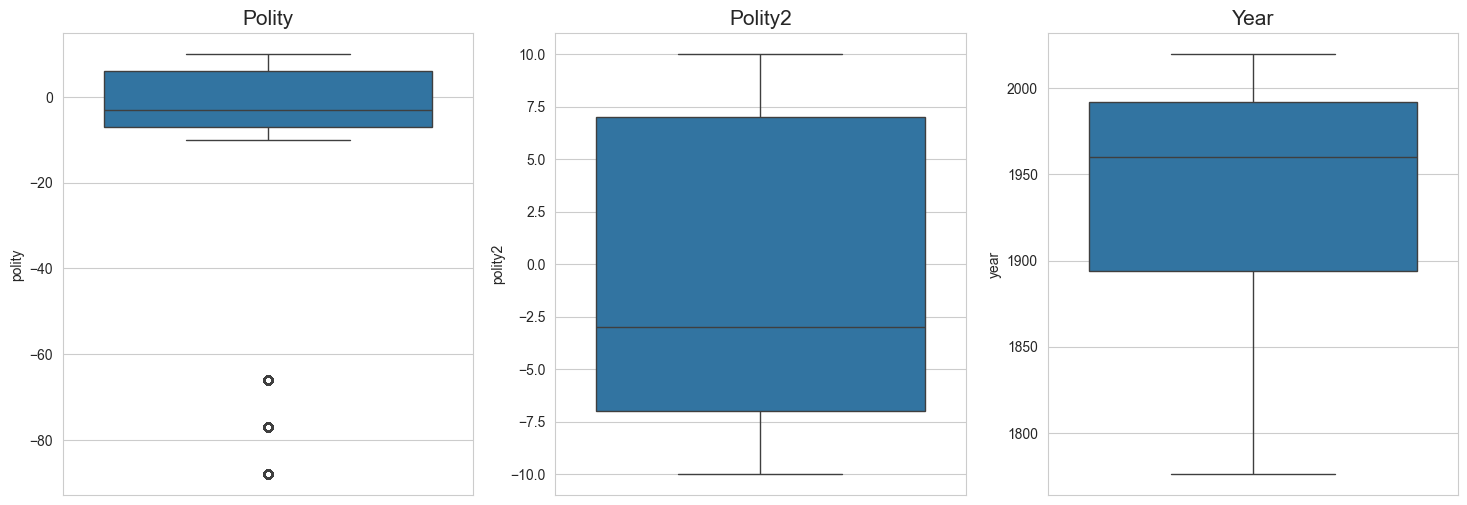

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(p5v, y='polity', ax=axs[0])
axs[0].set_title('Polity', fontsize=15)

sns.boxplot(p5v, y='polity2', ax=axs[1])
axs[1].set_title('Polity2', fontsize=15)

sns.boxplot(p5v, y='year', ax=axs[2])
axs[2].set_title('Year', fontsize=15)

plt.savefig('Graphs/polity_var_distrib.png')
plt.show()

> Also the country names are very similar so we can merges this dataframe using this column saffely.

In [25]:
p5v.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Baden',
       'Bahrain', 'Bavaria', 'Belgium', 'Benin', 'Burkina Faso', 'Bhutan',
       'Belarus', 'Bangladesh', 'Bolivia', 'Bosnia', 'Botswana', 'Brazil',
       'Burundi', 'Bulgaria', 'Cambodia', 'Canada', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo-Brazzaville', 'Congo Brazzaville',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechoslovakia',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Vietnam North', 'Ecuador', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Ethiopia', 'Timor Leste', 'Finland', 'Fiji',
       'France', 'Gabon', 'Gambia', 'Gran Colombia', 'Germany East',
       'Germany West', 'Ghana', 'Prussia', 'Germany', 'Guinea-Bissau',
       'Greece', 'Georgia', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 

In [26]:
navco.LOCATION.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Aruba', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Benin', 'Bolivia', 'Bosnia-Herzegovina', 'Brazil',
       'Brunei', 'Bulgaria', 'Burma/Myanmar', 'Burundi', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo-Brazzaville (ROC)', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Djibouti', 'Dominican Republic',
       'East Germany', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'France', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Ivory Coast', 'Jordan',
       'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia',
       'Libya', 'Lithuania', 'Macedonia

## 4. Exploratory Data Analysis (EDA)

### 4.1 Historical Trends

> Lets create the column decade

In [27]:
navco['decade'] = (navco['EYEAR'] // 10) * 10
navco.head()

,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,decade
0,Afghans,Afghanistan,1978.0,1979.0,Afghan government,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,613.0,10000.0,0.000641,1.0,1.0,NaN,1.0,1.0,1.0,1970.0
1,Afghan resistance,Afghanistan,1980.0,1989.0,Soviet occupation,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3281.0,10000.0,0.000685,1.0,0.0,NaN,1.0,0.0,1.0,1980.0
2,Taliban/anti-government forces,Afghanistan,1992.0,1996.0,Afghan regime,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1370.0,20000.0,0.000893,1.0,0.0,NaN,1.0,0.0,0.0,1990.0
3,Taliban,Afghanistan,2001.0,2014.0,Afghan government,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4391.0,60000.0,0.001625,1.0,1.0,NaN,1.0,1.0,0.0,2010.0
4,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0,1990.0


In [28]:
navco.decade.describe()

count     389.000000
mean     1984.601542
std        20.361630
min      1940.000000
25%      1970.000000
50%      1990.000000
75%      2000.000000
max      2010.000000
Name: decade, dtype: float64

> Calculating the number of violent and non violent campaigns per decade in order to plot the with stackplot

In [29]:
campaigns_per_decade = navco.groupby(['decade', 'NONVIOL']).size().unstack(fill_value=0)
campaigns_per_decade

NONVIOL,0.0,1.0
decade,,
1940.0,12,2
1950.0,25,9
1960.0,21,8
1970.0,27,13
1980.0,17,30
1990.0,54,36
2000.0,23,37
2010.0,41,34


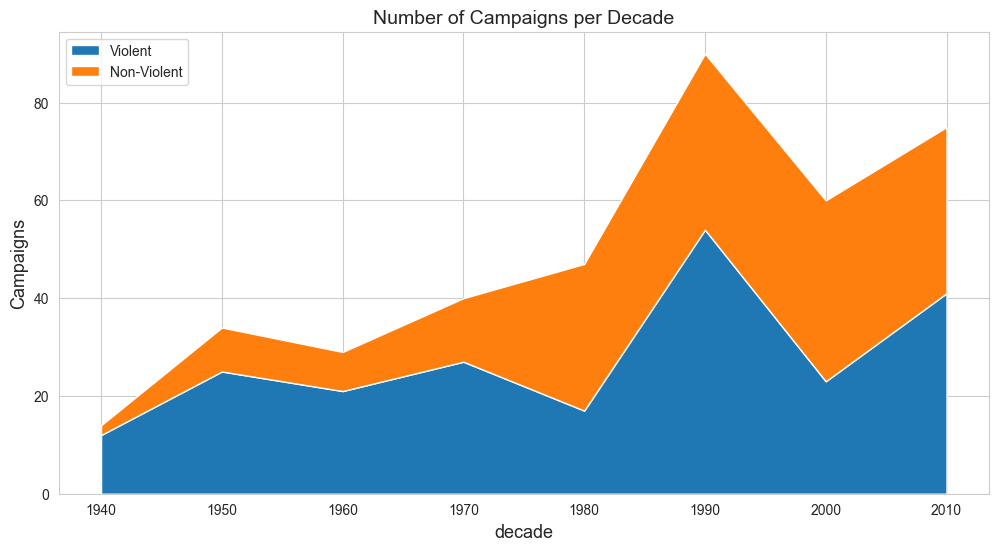

In [30]:
# The Plot we need is the stacked area plot
plt.figure(figsize=(12, 6))

plt.stackplot(campaigns_per_decade.index, campaigns_per_decade[0], campaigns_per_decade[1],
              labels=['Violent', 'Non-Violent'])

plt.title('Number of Campaigns per Decade', fontsize=14)
plt.xlabel('decade', fontsize=13)
plt.ylabel('Campaigns', fontsize=13)
plt.legend(loc='upper left')

plt.savefig('Graphs/campaigns_per_decade.png')
plt.show()

> For the second plot we must calculate the success rate per decade wich actually is the mean of the success column and the number of campaign per decade

In [31]:
success_ratio = navco.query('NONVIOL == 1').groupby('decade').agg(campaigns=('decade', 'count'), success_perc=('SUCCESS', 'mean'))
success_ratio.index = (success_ratio.index).astype(int)
success_ratio

,campaigns,success_perc
decade,,
1940,2,0.500000
1950,9,0.222222
1960,8,0.250000
1970,13,0.538462
1980,30,0.466667
1990,36,0.833333
2000,37,0.675676
2010,34,0.382353


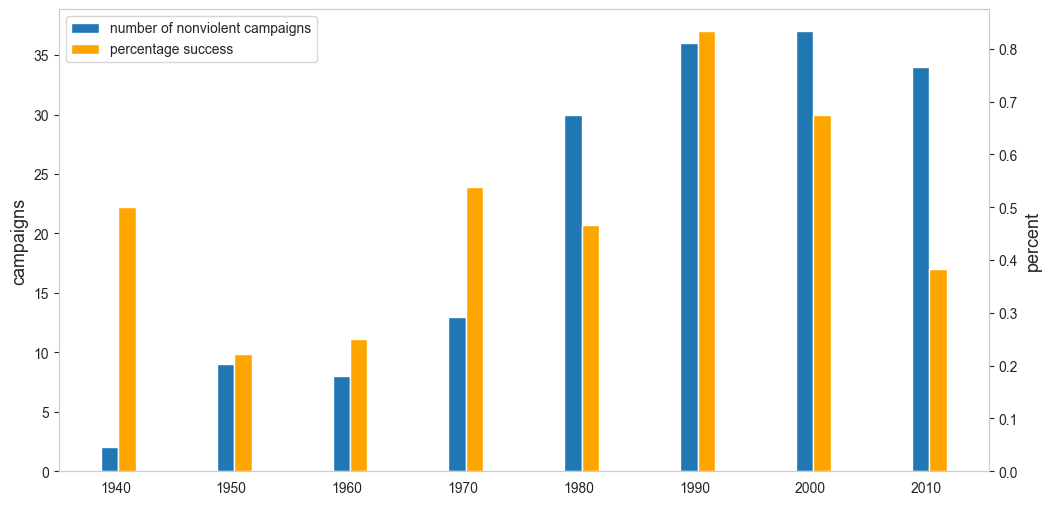

In [32]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(success_ratio.index-.5, success_ratio['campaigns'], width=1.5, label='number of nonviolent campaigns')
ax1.set_ylabel('campaigns', fontsize=13)

ax2 = ax1.twinx()

ax2.bar(success_ratio.index+1, success_ratio['success_perc'], color='orange', width=1.5, label='percentage success')
ax2.set_ylabel('percent', fontsize=13)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

ax1.grid(False)
ax2.grid(False)

plt.savefig('Graphs/nonviol_campaigns_stats.png')
plt.show()

> The next plot with just a simple pivot_table we can take the mean of success for every decade as rows and from the nonviolent as columns

In [33]:
viol_success_rate = navco.pivot_table(index='decade', columns='NONVIOL', values='SUCCESS', aggfunc='mean')
viol_success_rate

NONVIOL,0.0,1.0
decade,,
1940.0,0.500000,0.500000
1950.0,0.320000,0.222222
1960.0,0.190476,0.250000
1970.0,0.444444,0.538462
1980.0,0.294118,0.466667
1990.0,0.277778,0.833333
2000.0,0.130435,0.675676
2010.0,0.073171,0.382353


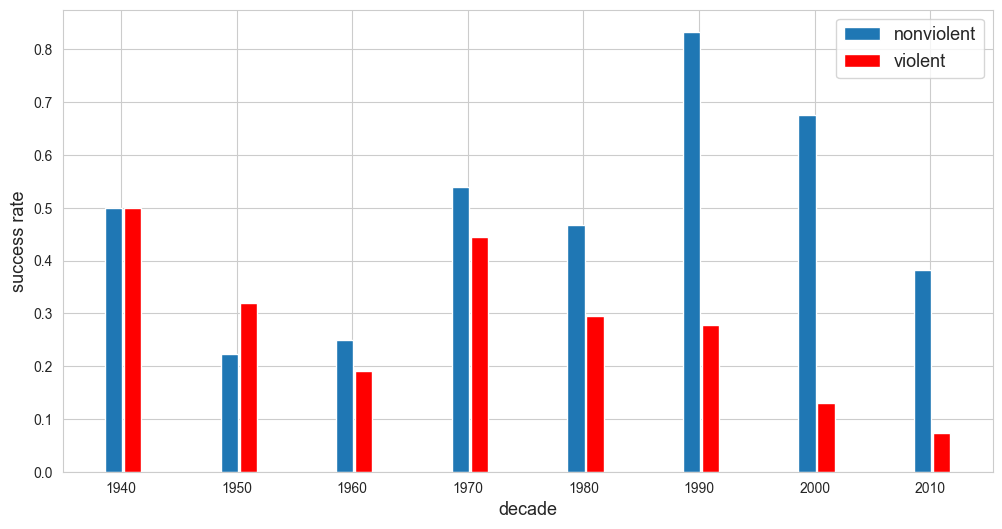

In [34]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1

ax2.bar(viol_success_rate.index-0.65, viol_success_rate[1.0], label='nonviolent', width=1.5)
ax1.bar(viol_success_rate.index+1, viol_success_rate[0.0], label='violent', color='red', width=1.5)

plt.legend(loc='upper right', fontsize=13)
plt.xlabel('decade', fontsize=13)
plt.ylabel('success rate', fontsize=13)

plt.savefig('Graphs/campaigns_rate.png')
plt.show()

### 4.2 Largest Resistance Campaigns, 1946-2014

> First we need to take the campaigns that had more that 2% of participation and create the description column for the y axis

In [35]:
largest_campaigns = navco.query('PERCENTAGEPOPULARPARTICIPATION > .02').copy()
largest_campaigns['description'] = largest_campaigns[['LOCATION', 'TARGET']].apply(lambda row: row['LOCATION'] + ': ' + row['TARGET'], axis=1)
largest_campaigns.head()

,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,decade,description
4,Albanian anti-communist,Albania,1990.0,1991.0,Communist regime,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,442.0,300000.0,0.091068,1.0,0.0,0.0,1.0,1.0,0.0,1990.0,Albania: Communist regime
14,pro-democracy movement,Argentina,1977.0,1983.0,military junta,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2415.0,9000000.0,0.302013,1.0,0.0,1.0,0.0,1.0,0.0,1980.0,Argentina: military junta
19,Anti-King Hamad Campaign,Bahrain,2011.0,2014.0,Monarchy of King Hamad,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1050.0,100000.0,0.063816,1.0,0.0,1.0,0.0,0.0,0.0,2010.0,Bahrain: Monarchy of King Hamad
34,Brunei Revolt,Brunei,1962.0,1962.0,Brunei government,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,4000.0,0.044641,1.0,0.0,NaN,0.0,1.0,1.0,1960.0,Brunei: Brunei government
63,anti-Pinochet campaign,Chile,1983.0,1989.0,Augusto Pinochet,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2409.0,700000.0,0.054264,1.0,1.0,1.0,0.0,1.0,0.0,1980.0,Chile: Augusto Pinochet


> Drop all the columns that are no needed for the diagram

In [36]:
largest_campaigns = largest_campaigns[['SUCCESS', 'LIMITED', 'FAILURE', 'PERCENTAGEPOPULARPARTICIPATION', 'description']]
largest_campaigns['PERCENTAGEPOPULARPARTICIPATION'] = round(largest_campaigns['PERCENTAGEPOPULARPARTICIPATION']*100, 2)
largest_campaigns.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', inplace=True, ascending=False)
largest_campaigns.head()

,SUCCESS,LIMITED,FAILURE,PERCENTAGEPOPULARPARTICIPATION,description
295,1.0,0.0,0.0,45.01,Slovenia: Yugoslavian rule
14,1.0,0.0,0.0,30.20,Argentina: military junta
384,1.0,0.0,0.0,28.51,Zambia: British rule
192,1.0,0.0,0.0,25.08,Lebanon: Syrian forces
194,1.0,0.0,0.0,19.46,Lebanon: Government of Prime Minister Fouad Si...


> We create a new column called outcome that describe the outcome of the campaign. 1 = Fail, 2 = Limited success, 3 = Success

In [37]:
largest_campaigns.loc[largest_campaigns['LIMITED'] == 1, 'LIMITED'] += 1
largest_campaigns.loc[largest_campaigns['SUCCESS'] == 1, 'SUCCESS'] += 2
largest_campaigns['outcome'] = largest_campaigns['LIMITED'] + largest_campaigns['SUCCESS'] + largest_campaigns['FAILURE']
largest_campaigns.reset_index(inplace=True, drop=True)
largest_campaigns

,SUCCESS,LIMITED,FAILURE,PERCENTAGEPOPULARPARTICIPATION,description,outcome
0,3.0,0.0,0.0,45.01,Slovenia: Yugoslavian rule,3.0
1,3.0,0.0,0.0,30.20,Argentina: military junta,3.0
2,3.0,0.0,0.0,28.51,Zambia: British rule,3.0
3,3.0,0.0,0.0,25.08,Lebanon: Syrian forces,3.0
4,3.0,0.0,0.0,19.46,Lebanon: Government of Prime Minister Fouad Si...,3.0
5,3.0,0.0,0.0,19.21,Estonia: Communist regime,3.0
6,3.0,0.0,0.0,17.95,Tunisia: Council negotiating end to political ...,3.0
7,3.0,0.0,0.0,15.59,Egypt: President Morsi,3.0
8,3.0,0.0,0.0,9.43,Latvia: Communist regime,3.0
9,3.0,0.0,0.0,9.11,Albania: Communist regime,3.0


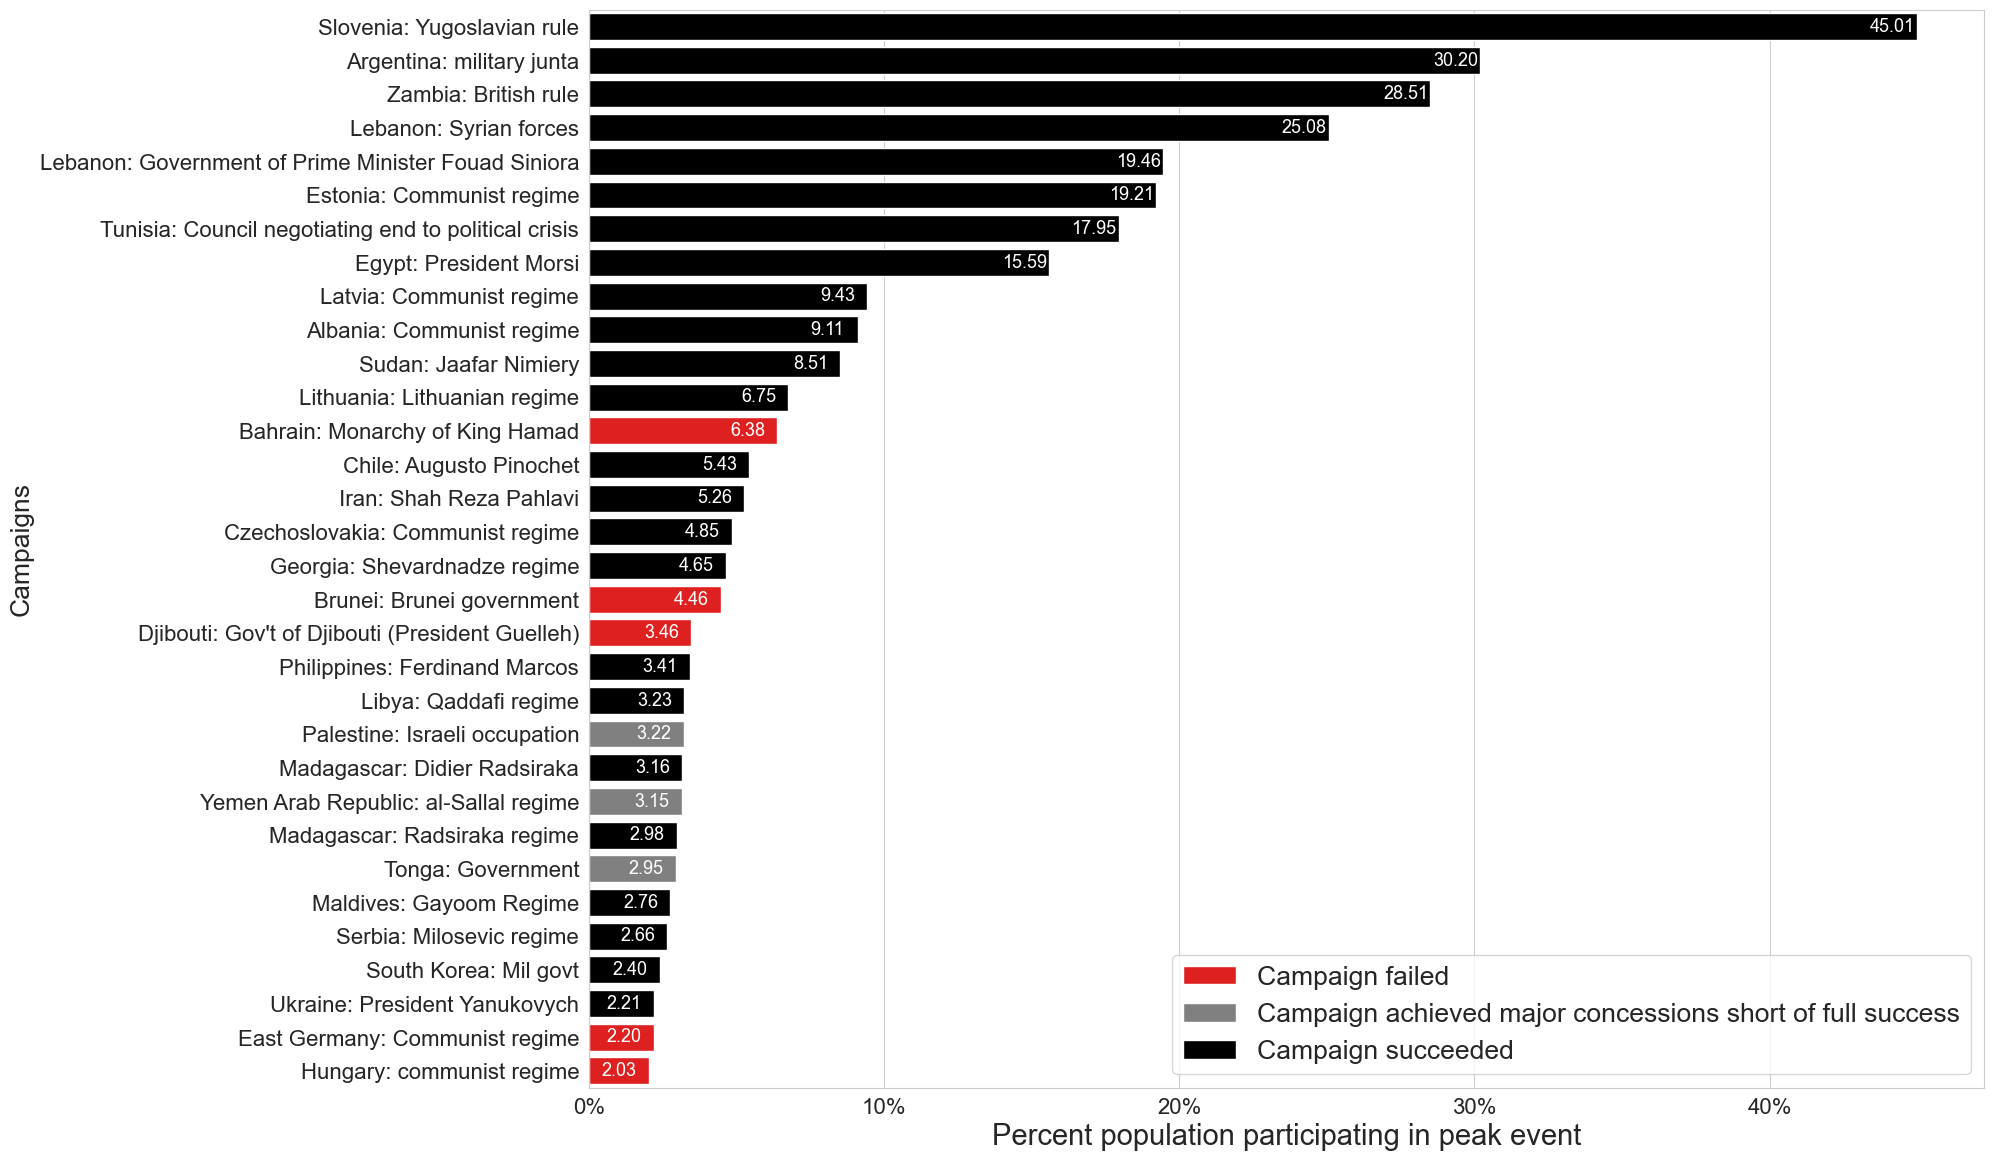

In [38]:
plt.figure(figsize=(18,14))

palette = {
    1: 'red',
    2: 'grey',
    3: 'black'
}
sns.barplot(largest_campaigns,
            x='PERCENTAGEPOPULARPARTICIPATION',
            y='description',
            hue='outcome',
            palette=palette)

plt.ylabel('Campaigns', fontsize=19)
plt.xlabel('Percent population participating in peak event', fontsize=21)

# Format the x axis
def percentage_formatter(x, pos):
    return f'{x:.0f}%'
plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Change legend labels
legend_labels = {
    '1.0': 'Campaign failed',
    '2.0': 'Campaign achieved major concessions short of full success',
    '3.0': 'Campaign succeeded'
}

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [legend_labels[label] for label in labels], fontsize=19.1)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add the value of each bar
for index, value in enumerate(largest_campaigns['PERCENTAGEPOPULARPARTICIPATION']):
    plt.text(value - 1.6, index, f'{value:.2f}', color='white', va='center', fontsize=13)

plt.savefig('Graphs/largest_resistancies.png')
plt.show()

> Greece campaigns overview

In [39]:
greece = navco.query('LOCATION == "Greece"')
greece

,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,NONVIOL,VIOL,REGCHANGE,FSELFDET,SECESSION,OTHER,DURATION,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,REGVIOL,DEFECT,VIOLENTFLANK,VIOLSIM,REGAID,STATESUP,decade
119,Greek Civil War,Greece,1946.0,1949.0,British and US occupation,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1778.0,40000.0,0.005092,1.0,0.0,NaN,0.0,1.0,1.0,1940.0
120,Greek anti-military,Greece,1973.0,1974.0,Military rule,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,654.0,2500.0,0.000279,1.0,1.0,1.0,0.0,1.0,0.0,1970.0


> Greek Military Rule

The truth is that with a simple google search we can found many information that proves that the participation in the campaign of Greek anti-military rule was much greater than 2500. We can see in [Wikipeadia](https://el.wikipedia.org/wiki/%CE%95%CE%BE%CE%AD%CE%B3%CE%B5%CF%81%CF%83%CE%B7_%CF%84%CE%BF%CF%85_%CE%A0%CE%BF%CE%BB%CF%85%CF%84%CE%B5%CF%87%CE%BD%CE%B5%CE%AF%CE%BF%CF%85) that 800 student where locked in patra's university and the total injured people where more than 2000 people. In other sources like [MoneyReview](https://www.moneyreview.gr/society/128462/50-chronia-polytechneio-to-chroniko-tis-exegersis-ton-foititon-to-1973/) was writen recentlly that more than 100.000 student where in the last day of the campaign.

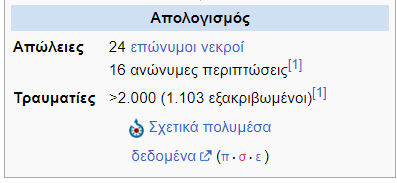
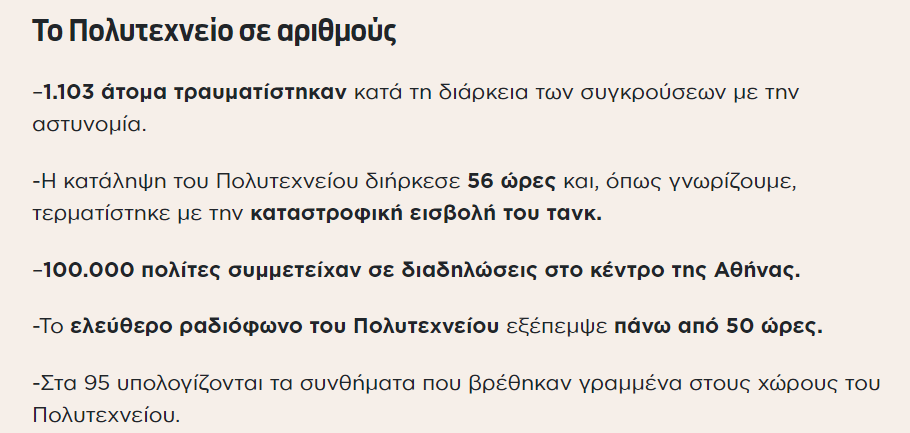

> Greek Civil War

In the greek civil war campaign its more obvious that the number of participation is not true cause its was a civil war that affected all the greek people and the participations are obviouos more that 45.000. Again with a simple search we can find many sources, like [wikipedia](https://en.wikipedia.org/wiki/Greek_Civil_War), that the participations are said to be much greater than 45K. 

### 4.3 The Effect of Participation on the Probability of Campaign Success

> For the logistic regression we will need only the columns 'SUCCESS', 'PARTICIPATION' and 'PERCENTAGEPOPULARPARTICIPATION'

In [40]:
navco_cleaned = navco.dropna(subset=['PARTICIPATION', 'SUCCESS', 'PERCENTAGEPOPULARPARTICIPATION']) \
                            [['PARTICIPATION', 'SUCCESS', 'PERCENTAGEPOPULARPARTICIPATION']].copy()

print(navco_cleaned.shape)
navco_cleaned.head()

(380, 3)


,PARTICIPATION,SUCCESS,PERCENTAGEPOPULARPARTICIPATION
0,10000.0,1.0,0.000641
1,10000.0,1.0,0.000685
2,20000.0,1.0,0.000893
3,60000.0,0.0,0.001625
4,300000.0,1.0,0.091068


> lets see first the correlations between that columns and the dive in the regression

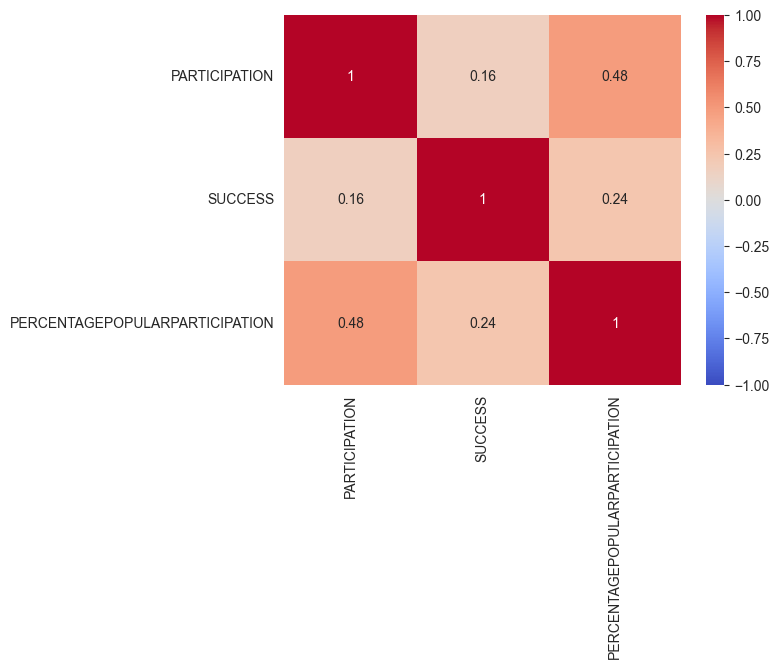

In [41]:
sns.heatmap(navco_cleaned.corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.savefig('Graphs/correlation1.png')
plt.show()

> According to the documentation of NAVCO 1.1 for the logistic regression we will need to create new variable called Membership per capita that according to the variable table is a division of two logged columns, the participation and the population. The population column actually dont exist but we have the participation and percentage of the population that participated in the campaign, so we can create it.

In [42]:
navco_cleaned['POP'] = navco_cleaned['PARTICIPATION'] / navco_cleaned['PERCENTAGEPOPULARPARTICIPATION']
navco_cleaned['MEMPC'] = np.log(navco_cleaned['PARTICIPATION']) / np.log(navco_cleaned['POP'])

> We can see now that the column with the highest correlation with success is the mempc.

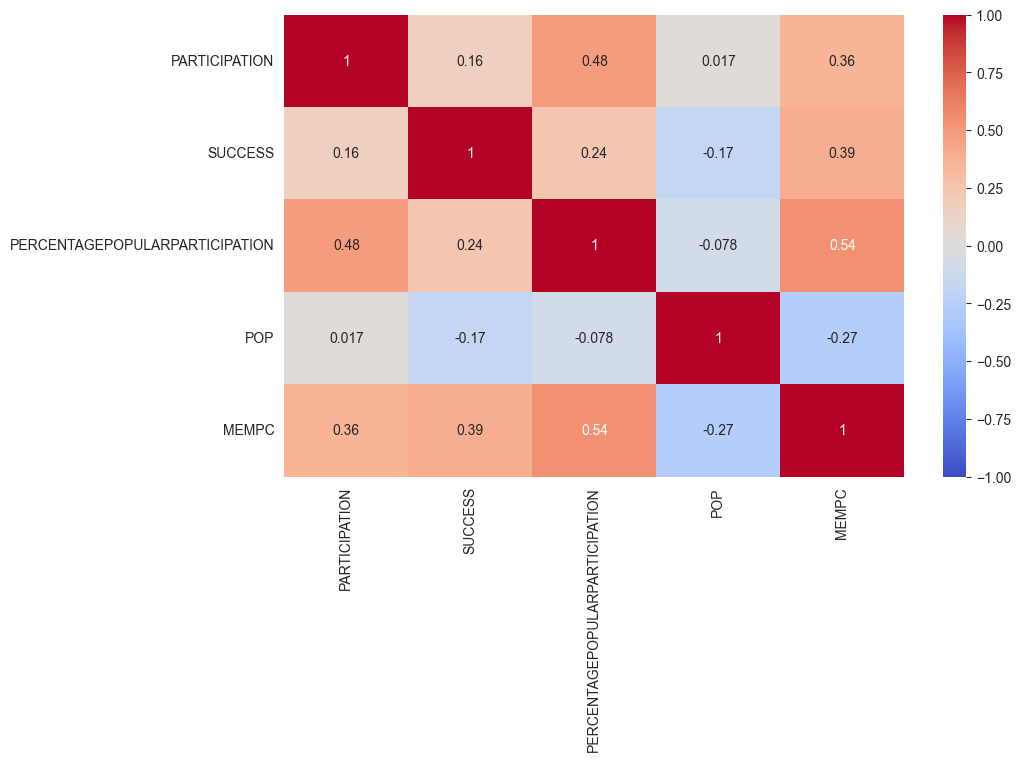

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(navco_cleaned.corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.savefig('Graphs/correlation2.png')
plt.show()

> Αccording to the pronunciation the first logistic regression model must contain as dependent variable the MEMPC and the logged population, as well as the second one must contain only the MEMPC

In [44]:
logit_reg1 = Logit.from_formula("SUCCESS ~ np.log(POP) + MEMPC", data=navco_cleaned).fit()
logit_reg2 = Logit.from_formula("SUCCESS ~ MEMPC", data=navco_cleaned).fit()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


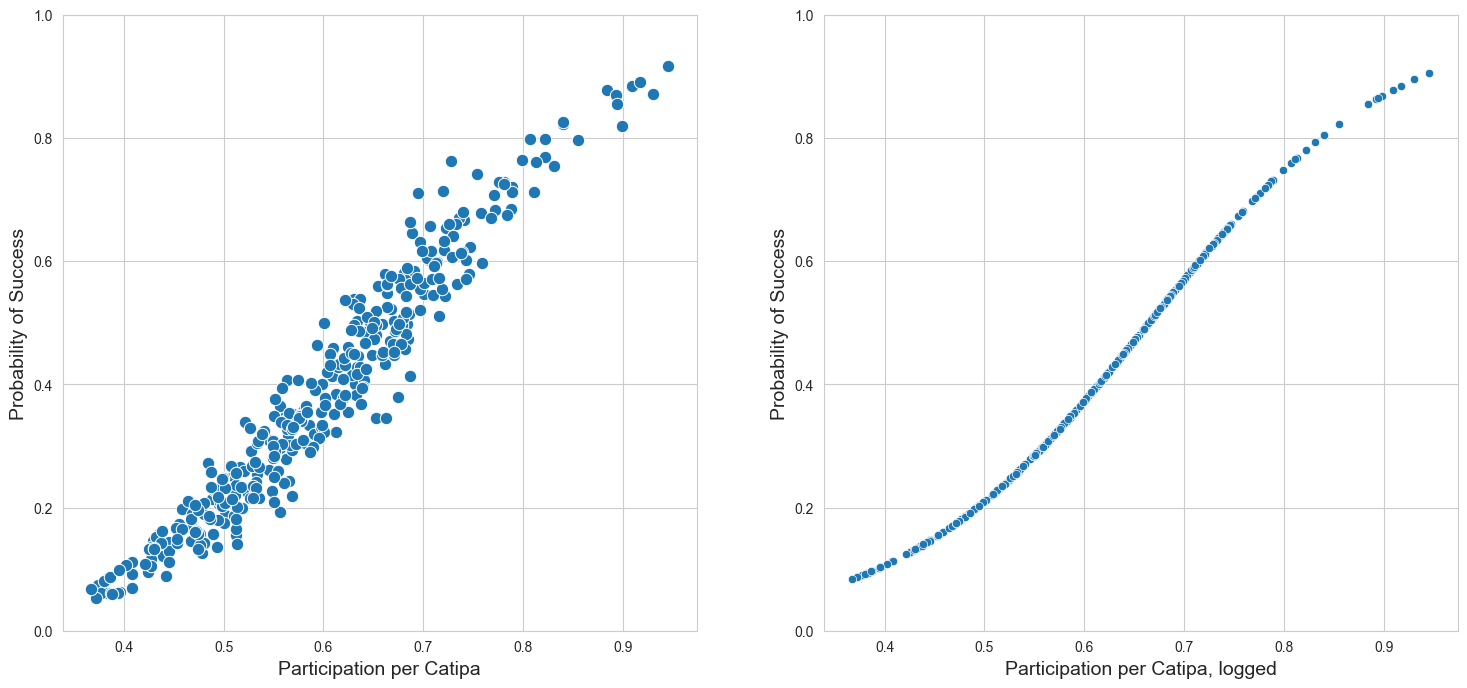

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(x=navco_cleaned['MEMPC'],
                y=logit_reg1.predict(),
                s=80,
                ax=axs[0]
               )
axs[0].set_ylabel('Probability of Success', fontsize=14)
axs[0].set_xlabel('Participation per Catipa', fontsize=14)
axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

sns.scatterplot(x=navco_cleaned['MEMPC'],
                y=logit_reg2.predict(),
                ax=axs[1]
               )
axs[1].set_ylabel('Probability of Success', fontsize=14)
axs[1].set_xlabel('Participation per Catipa, logged', fontsize=14)
axs[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

plt.savefig('Graphs/logit_reg_per_capita.png')
plt.show()

> Now about the explanaition of this two diagrams. It is common sense that this diagrams have nothing to do with the 3.5% rule cause the rule was created with a different way. By simple dividing the number of successed campaigns with participation greater than 3.5% with all the participation with more than 3.5% we can take that probability of success with a participation greater than 3.5%. The graphs actually show the impact of the depended variables on the probability of the success and not the outcome or the rule. The difference between the first and the second graph is because the first graph is a multivariate model rather than the second one and actually repressed the impact in the probability of more than one variable combined. This leads to scattered representation of the impact as such every added variable adds also and noise. By the way from the summary of those model we can notice the following.

In [46]:
logit_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1297
Time:                        20:26:01   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.189e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.8142      1.496     -1.881      0.060      -5.746       0.118
np.log(POP)    -0.1388      0.074     -1.887      0.059      -0.283       0.005
MEMPC           7.6475      1.166      6.556      0.000       5.361       9.934
===============================================================================
"""

>The log(POP) along with the intercept are both insignificant cause their pvalue is greater than 0.05 (0.06 and 0.059) and if we remove the log(POP) the intercept become again significant. That also means that the log(POP) was adding more noise rather than actuall insights in the model

In [47]:
logit_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1225
Time:                        20:26:01   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3469      0.709     -7.536      0.000      -6.737      -3.956
MEMPC          8.0495      1.141      7.052      0.000       5.812      10.287
==============================================================================
"""

In [48]:
X = navco_cleaned[['MEMPC', 'POP']].copy()
X['POP'] = np.log(X['POP'])

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,MEMPC,17.742013
1,POP,17.742013


In [49]:
print('Pearson linear correlation: ', np.corrcoef(navco_cleaned['MEMPC'], np.log(navco_cleaned['POP']))[0, 1])
print('Spearman linear correlation: ', spearmanr(navco_cleaned['MEMPC'], np.log(navco_cleaned['POP']))[0])

Pearson linear correlation:  -0.293859332684283
Spearman linear correlation:  -0.2556645622789543


> The reason why population is creating problems is cause the MEMPC was created from the population so we have multicollinearity problem.

### 4.4 The Level of Participation Tipping Point

> In order to create the table we must cut the navco dataframe into the respective parts. So we create 2 arrays, one with the description of the first column of the table and the second that contains the queries to cut the dataframe into the respective parts.

In [50]:
strings = ['greater than 3.5%', '1.0% - 3.5%', '0.25% - 1.0%', '0.06% - 0.25%', '0.015% - 0.06%', '0.0035% - 0.015%', 'less than 0.0035%']
queries = [
    'PERCENTAGEPOPULARPARTICIPATION > 0.035',
    'PERCENTAGEPOPULARPARTICIPATION > 0.01 and PERCENTAGEPOPULARPARTICIPATION <= 0.035',
    'PERCENTAGEPOPULARPARTICIPATION > 0.0025 and PERCENTAGEPOPULARPARTICIPATION <= 0.01',
    'PERCENTAGEPOPULARPARTICIPATION > 0.0006 and PERCENTAGEPOPULARPARTICIPATION <= 0.0025',
    'PERCENTAGEPOPULARPARTICIPATION > 0.00015 and PERCENTAGEPOPULARPARTICIPATION <= 0.0006',
    'PERCENTAGEPOPULARPARTICIPATION > 0.000035 and PERCENTAGEPOPULARPARTICIPATION <= 0.00015',
    'PERCENTAGEPOPULARPARTICIPATION <= 0.000035'
]

In [51]:
results = []
for count, query in enumerate(queries):
    data = navco_cleaned.query(query)
    success_rate = str(round(data['SUCCESS'].sum() / len(data['SUCCESS']) * 100, 2)) + "%"
    
    results.append([strings[count],
                    data.shape[0],
                    success_rate
                   ])
results = pd.DataFrame(results, columns=['Peak Popular Participation (%)', 'Observations', 'Success Rate'])

results['Observations'] = results['Observations'].astype(str)
results['Success Rate'] = results['Success Rate'].astype(str)

results

,Peak Popular Participation (%),Observations,Success Rate
0,greater than 3.5%,18,88.89%
1,1.0% - 3.5%,41,60.98%
2,0.25% - 1.0%,92,45.65%
3,0.06% - 0.25%,95,45.26%
4,0.015% - 0.06%,66,24.24%
5,0.0035% - 0.015%,44,9.09%
6,less than 0.0035%,24,4.17%


> Lets now try to print the table with a pretty way

In [52]:
markdown_table = results.to_markdown(index=False)
Markdown(markdown_table)

| Peak Popular Participation (%)   |   Observations | Success Rate   |
|:---------------------------------|---------------:|:---------------|
| greater than 3.5%                |             18 | 88.89%         |
| 1.0% - 3.5%                      |             41 | 60.98%         |
| 0.25% - 1.0%                     |             92 | 45.65%         |
| 0.06% - 0.25%                    |             95 | 45.26%         |
| 0.015% - 0.06%                   |             66 | 24.24%         |
| 0.0035% - 0.015%                 |             44 | 9.09%          |
| less than 0.0035%                |             24 | 4.17%          |

In [53]:
# Use tabulate to create a pretty table
table = tabulate(results, headers='keys', tablefmt='fancy_grid', showindex=False)

print(table)

╒══════════════════════════════════╤════════════════╤════════════════╕
│ Peak Popular Participation (%)   │   Observations │ Success Rate   │
╞══════════════════════════════════╪════════════════╪════════════════╡
│ greater than 3.5%                │             18 │ 88.89%         │
├──────────────────────────────────┼────────────────┼────────────────┤
│ 1.0% - 3.5%                      │             41 │ 60.98%         │
├──────────────────────────────────┼────────────────┼────────────────┤
│ 0.25% - 1.0%                     │             92 │ 45.65%         │
├──────────────────────────────────┼────────────────┼────────────────┤
│ 0.06% - 0.25%                    │             95 │ 45.26%         │
├──────────────────────────────────┼────────────────┼────────────────┤
│ 0.015% - 0.06%                   │             66 │ 24.24%         │
├──────────────────────────────────┼────────────────┼────────────────┤
│ 0.0035% - 0.015%                 │             44 │ 9.09%          │
├─────

In [54]:
from prettytable import DOUBLE_BORDER
table = PrettyTable()

# Set column names and make them bold and black
table.field_names = [Fore.BLACK + Style.BRIGHT + col + Style.RESET_ALL for col in results.columns]

# Add rows to the table
for i, (index, row) in enumerate(results.iterrows()):
    # Determine the color for the row based on the index
    row_color = Fore.GREEN if i < 2 else Fore.RED
    
    # Apply colors based on conditions
    colorized_row = [
        row_color + str(cell) + Style.RESET_ALL for cell in row
    ]
    table.add_row(colorized_row)

# Set the frame style to GRID
table.set_style(DOUBLE_BORDER)

print(table)

╔════════════════════════════════╦══════════════╦══════════════╗
║ Peak Popular Participation (%) ║ Observations ║ Success Rate ║
╠════════════════════════════════╬══════════════╬══════════════╣
║       greater than 3.5%        ║      18      ║    88.89%    ║
║          1.0% - 3.5%           ║      41      ║    60.98%    ║
║          0.25% - 1.0%          ║      92      ║    45.65%    ║
║         0.06% - 0.25%          ║      95      ║    45.26%    ║
║         0.015% - 0.06%         ║      66      ║    24.24%    ║
║        0.0035% - 0.015%        ║      44      ║    9.09%     ║
║       less than 0.0035%        ║      24      ║    4.17%     ║
╚════════════════════════════════╩══════════════╩══════════════╝


> Now in order to find the percentage of the population that is the tipping point for success in a campaign with 99% probability from the logistic regression model we created we will need the second model. That's because the second model contains only the Membership per capita in order to find the probability with only the impact of MEMPC in the probability of success and not the a multivariate model that has more noise and impact of other parameters too. So what we will try to do is reverse the logistic regression function in order to give the probability and calculate the MEMPC

In [55]:
logit_reg2.params

Intercept   -5.346891
MEMPC        8.049520
dtype: float64

The function that the Logistic regression founds the probability is the following.

$$ p(x) = \frac{1}{1 + e^{-(intercept + coefx)}} $$

All we have to do is solve for $x$ and then we get this:

$$ x = \frac{-(\ln{\frac{1 - p(x)}{p(x)}} + intercept)}{coef} $$

As $p(x)$ we have $ 0.99 $

In [56]:
print('Participation per Catipa(MEMPC) for 80%: ' , -(np.log((1 - 0.80) / 0.80) + logit_reg2.params[0]) / logit_reg2.params[1]) 
print('Participation per Catipa(MEMPC) for 90%: ' , -(np.log((1 - 0.90) / 0.90) + logit_reg2.params[0]) / logit_reg2.params[1]) 
print('Participation per Catipa(MEMPC) 99%: ' , -(np.log((1 - 0.99) / 0.99) + logit_reg2.params[0]) / logit_reg2.params[1])
print('Participation per Catipa(MEMPC) 99.9%: ' , -(np.log((1 - 0.999) / 0.999) + logit_reg2.params[0]) / logit_reg2.params[1])

Participation per Catipa(MEMPC) for 80%:  0.8364703929864653
Participation per Catipa(MEMPC) for 90%:  0.9372130733034035
Participation per Catipa(MEMPC) 99%:  1.235106026445725
Participation per Catipa(MEMPC) 99.9%:  1.5222827698396668


In [57]:
logit_reg2.predict(pd.DataFrame([0.8364703929864653, 0.9372130733034035, 1.235106026445725, 1.5222827698396668], columns=['MEMPC'])) * 100

0    80.0
1    90.0
2    99.0
3    99.9
dtype: float64

> So the above equation is correct cause is reverse verified. We could easily say now that the tipping point percentage participion is that of the campaign with MEMPC equals to 1.2351 cause the way that MEMPC is calculated is a type metric that is commonly use in other scientific field, like the income per capita that is measures the standard of living and quality of life of the population or the GDP per capita. This metrics are used in economic and statistical analysis when comparing populations. But in our situation we have logged the variables before dividing them.

>Dividing the natural logarithm of participation by the natural logarithm of the population might be an attempt to account for the relative size of the population when analyzing participation rates. Taking the logarithm can sometimes be used to scale or transform data, and in this case, it might be used to make the participation metric more comparable across different population sizes.

> We can also see that if we sort the df by MEMPC and plot the values the percentage of participation is also a bit sorted too. That means that if the membership per capita is increasing the percentage of participation is also increasing

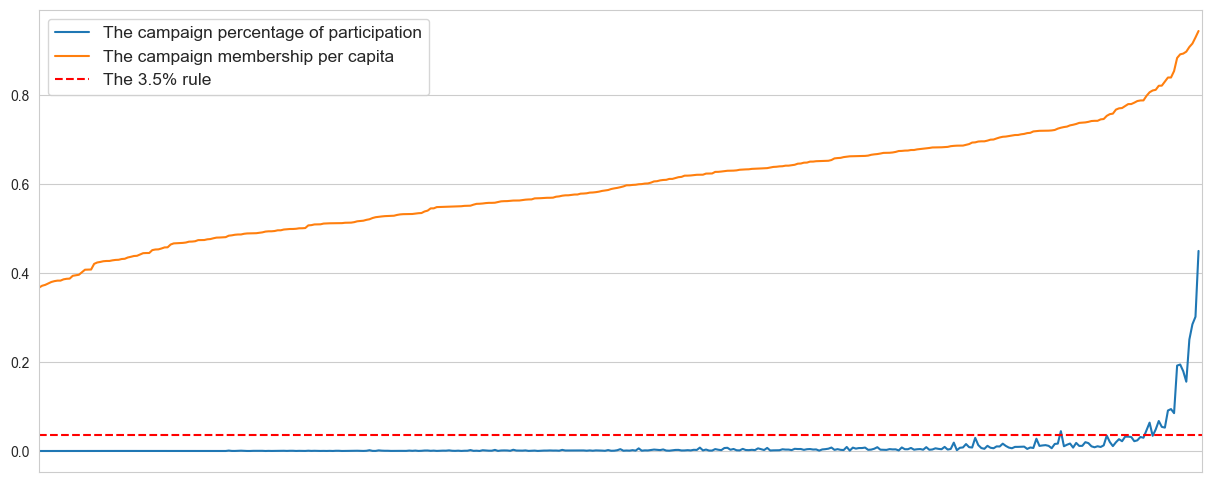

In [58]:
df = navco_cleaned.sort_values(by='MEMPC').reset_index(drop=True)

plt.figure(figsize=(15,6))
sns.lineplot(df,
             x=df.index,
             y='PERCENTAGEPOPULARPARTICIPATION',
             label='The campaign percentage of participation'
            )
sns.lineplot(df,
             x=df.index,
             y='MEMPC',
             label='The campaign membership per capita'
            )

plt.xlim(0, 380)
plt.xticks([])
plt.ylabel(None)
plt.xlabel(None)

plt.axhline(y=0.035, color='red', linestyle='--', label="The 3.5% rule")
plt.legend(fontsize=12.5)

plt.savefig('Graphs/mempc_percent_slope.png')
plt.show()

> With this way cause the MEMPC of our dataset have max value at 0.9449 we can see that the tipping point that the logistic regression is proposing doesn't exist in our data. So as a tipping point we can get the campaign with the max MEMPC, which is the following

In [59]:
navco_cleaned.MEMPC.max()

0.9449819632020432

In [60]:
df.tail(1)

,PARTICIPATION,SUCCESS,PERCENTAGEPOPULARPARTICIPATION,POP,MEMPC
379,900000.0,1.0,0.450129,1999429.0,0.944982


> If we try and calculate the 99% success rate the way that we calculated the table success ratios then we end up with much different results. So for every percentage of participation we will take all the above percetanges and divide the number successed campaings with the number of all the campaigns that are above.

In [61]:
data = navco_cleaned[['PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS', 'MEMPC']].sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=False)
data.reset_index(drop=True, inplace=True)
data.head()

,PERCENTAGEPOPULARPARTICIPATION,SUCCESS,MEMPC
0,0.450129,1.0,0.944982
1,0.302013,1.0,0.930431
2,0.285063,1.0,0.916722
3,0.250824,1.0,0.909004
4,0.194598,1.0,0.892521


In [62]:
# Iterate through the sorted column
success_sum = 0
success_count = 0
success_rate = 0
result = []

for index, value in enumerate(data['SUCCESS']):
    success_sum += value
    success_count += 1
    success_rate = success_sum / success_count
    
    result.append([success_rate, data['PERCENTAGEPOPULARPARTICIPATION'].loc[index] * 100, data['MEMPC'].loc[index]])

result = pd.DataFrame(result, columns=['SUCCESS_RATE', 'PERCENTAGEPOPULARPARTICIPATION', 'MEMPC'])
result.head()

,SUCCESS_RATE,PERCENTAGEPOPULARPARTICIPATION,MEMPC
0,1.0,45.012851,0.944982
1,1.0,30.201342,0.930431
2,1.0,28.506271,0.916722
3,1.0,25.082446,0.909004
4,1.0,19.459763,0.892521


> So from the results if the take all the success rates that are below 1, sort them and take the first of them we could say that this is the tipping point of 99% probability of success even though it doesnt have exactly 99% success rate but it is the highest success rate below the 100%. We can also see that the difference is massive in the percentage of participation. This point of view gives as a 4.65% with the previous one to be at 45.01%

In [63]:
result \
    .query('SUCCESS_RATE < 1') \
    .sort_values(by='SUCCESS_RATE', ascending=False) \
    .reset_index(drop=True)\
    .loc[0, :]

SUCCESS_RATE                      0.941176
PERCENTAGEPOPULARPARTICIPATION    4.650081
MEMPC                             0.799122
Name: 0, dtype: float64

> In the diagram below we can see the predictions of the table method along with the logistic regression prediction sorted by percentage of participation

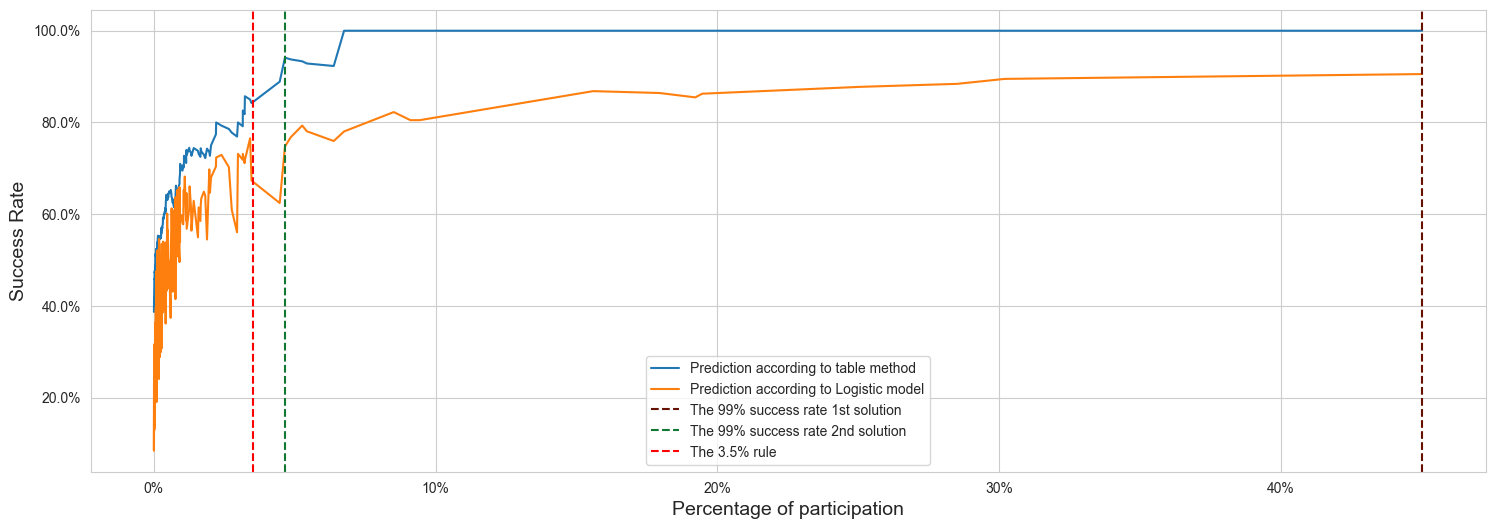

In [64]:
plt.figure(figsize=(18, 6))

sns.lineplot(result,
             x='PERCENTAGEPOPULARPARTICIPATION',
             y='SUCCESS_RATE',
             label='Prediction according to table method'
)

sns.lineplot(result,
             x='PERCENTAGEPOPULARPARTICIPATION',
             y=logit_reg2.predict(result['MEMPC']),
             label='Prediction according to Logistic model'
)

# Format the x axis
plt.xlabel('Percentage of participation', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)

plt.axvline(x=45.012851, color='#661100', linestyle='--', label='The 99% success rate 1st solution')
plt.axvline(x=4.65008137642408, color='#117733', linestyle='--', label='The 99% success rate 2nd solution')
plt.axvline(x=3.5, color='red', linestyle='--', label='The 3.5% rule')

def multiply_by_100(x, pos):
    return f'{x * 100:.1f}%'
plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(multiply_by_100))

plt.legend()
plt.savefig('Graphs/99percent_success_tipping_point.png')
plt.show()

### 4.5 Nonviolent Resistance and Target Regime Type

> For this regression model we will need more variables and we will need to create the Population, Membership per capita and filter the p5v dataset to extract the proper polity score for every campaign we have.

In [65]:
navco_cleaned = navco.dropna(subset=['PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS', 'NONVIOL', 'LOCATION', 'EYEAR']) \
                            [['PARTICIPATION', 'PERCENTAGEPOPULARPARTICIPATION', 'SUCCESS', 'NONVIOL', 'LOCATION', 'EYEAR']].copy()

navco_cleaned['POP'] = navco_cleaned['PARTICIPATION'] / navco_cleaned['PERCENTAGEPOPULARPARTICIPATION']

print(navco_cleaned.shape)
navco_cleaned.head()

(380, 7)


,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,SUCCESS,NONVIOL,LOCATION,EYEAR,POP
0,10000.0,0.000641,1.0,0.0,Afghanistan,1979.0,1.560000e+07
1,10000.0,0.000685,1.0,0.0,Afghanistan,1989.0,1.460000e+07
2,20000.0,0.000893,1.0,0.0,Afghanistan,1996.0,2.240000e+07
3,60000.0,0.001625,0.0,0.0,Afghanistan,2014.0,3.692109e+07
4,300000.0,0.091068,1.0,1.0,Albania,1991.0,3.294227e+06


> The mask we will apply to p5v dataset in order to extract the proper score is to have the same location and year with the navco_cleaned dataset in order to take the score from the right year and the right place.

In [66]:
mask = p5v[['country', 'year']].apply(tuple, axis=1).isin(navco_cleaned[['LOCATION', 'EYEAR']].apply(tuple, axis=1))
p5v = p5v[mask]
p5v

,country,year,polity,polity2
179,Afghanistan,1979,-66,NaN
189,Afghanistan,1989,-8,-8.0
196,Afghanistan,1996,-7,-7.0
214,Afghanistan,2014,-1,-1.0
296,Albania,1991,-88,3.0
...,...,...,...,...
17400,Yugoslavia,1971,-7,-7.0
17410,Yugoslavia,1981,-5,-5.0
17507,Zambia,1991,6,6.0
17517,Zambia,2001,5,5.0


In [67]:
navco_cleaned = pd.merge(navco_cleaned,
                         p5v[['country', 'year', 'polity', 'polity2']],
                         left_on=['LOCATION', 'EYEAR'],
                         right_on=['country', 'year'],
                         how='inner').drop(columns=['country', 'year'])
navco_cleaned.head()

,PARTICIPATION,PERCENTAGEPOPULARPARTICIPATION,SUCCESS,NONVIOL,LOCATION,EYEAR,POP,polity,polity2
0,10000.0,0.000641,1.0,0.0,Afghanistan,1979.0,1.560000e+07,-66,NaN
1,10000.0,0.000685,1.0,0.0,Afghanistan,1989.0,1.460000e+07,-8,-8.0
2,20000.0,0.000893,1.0,0.0,Afghanistan,1996.0,2.240000e+07,-7,-7.0
3,60000.0,0.001625,0.0,0.0,Afghanistan,2014.0,3.692109e+07,-1,-1.0
4,300000.0,0.091068,1.0,1.0,Albania,1991.0,3.294227e+06,-88,3.0


> We can see now that the hundrents of NaN values we had became only 8 at the polity2 score. This rows will be excluded at the logistic regression

In [68]:
print(navco_cleaned.shape)
navco_cleaned.isna().sum()

(305, 9)


PARTICIPATION                     0
PERCENTAGEPOPULARPARTICIPATION    0
SUCCESS                           0
NONVIOL                           0
LOCATION                          0
EYEAR                             0
POP                               0
polity                            0
polity2                           8
dtype: int64

> Lets run 2 logistic regression model. One with the polity2 score and one with polity score.

In [69]:
Logit.from_formula('SUCCESS ~ NONVIOL + polity2 + np.log(PARTICIPATION) + np.log(POP)', data=navco_cleaned).fit().summary()

Optimization terminated successfully.
         Current function value: 0.536938
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.2025
Time:                        20:26:02   Log-Likelihood:                -159.47
converged:                       True   LL-Null:                       -199.97
Covariance Type:            nonrobust   LLR p-value:                 1.075e-16
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.8727      1.498      1.250      0.211      -1.063       4.809
NONVIOL                   0.8662      0.295      2.936      0.003       0.288       1.445
polity2                   0.0522      0.025      2.057      0.040       0.002       0.102
np.log(PARTICIPATION)     0.4367      0.090      4.849      0.000       0.260       0.613
np.log(POP)              -0.4270      0.099     -4.321      0.000      -0.621      -0.233
=========================================================================================
"""

In [70]:
Logit.from_formula('SUCCESS ~ NONVIOL + polity + np.log(PARTICIPATION) + np.log(POP)', data=navco_cleaned).fit().summary()

Optimization terminated successfully.
         Current function value: 0.542765
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  305
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            4
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1935
Time:                        20:26:02   Log-Likelihood:                -165.54
converged:                       True   LL-Null:                       -205.27
Covariance Type:            nonrobust   LLR p-value:                 2.277e-16
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.2494      1.508      0.829      0.407      -1.706       4.205
NONVIOL                   0.9251      0.287      3.225      0.001       0.363       1.487
polity                   -0.0094      0.004     -2.339      0.019      -0.017      -0.002
np.log(PARTICIPATION)     0.4256      0.087      4.874      0.000       0.254       0.597
np.log(POP)              -0.3941      0.099     -3.989      0.000      -0.588      -0.200
=========================================================================================
"""

In [71]:
print(round(((np.e**0.8662) - 1) * 100, 2), '%')
print(round(((np.e**0.9251) - 1) * 100, 2), '%')

137.79 %
152.21 %


> We can see in both situations the non violent resistance remain significant with a pvalue < 0.01 in both models, also we can see that in both model the nonviol variable have a significant impact in the output of the campaign with an increase of the odds ratio more than 100%. That means that if the campaign is not violent the probability of success is much greater. The only thing that is strange is that intercept is insignificant, but as we see below this is cause of the log(POP) variable. The same happend in the 2nd model with the MEMPC and POP.

In [72]:
X = navco_cleaned[['NONVIOL', 'polity', 'PARTICIPATION', 'POP']].copy()
X['PARTICIPATION'] = np.log(X['PARTICIPATION'])
X['POP'] = np.log(X['POP'])

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,NONVIOL,2.334636
1,polity,1.212889
2,PARTICIPATION,34.182423
3,POP,28.913981


In [73]:
X = navco_cleaned[['NONVIOL', 'polity2', 'PARTICIPATION', 'POP']].dropna().copy()
X['PARTICIPATION'] = np.log(X['PARTICIPATION'])
X['POP'] = np.log(X['POP'])

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,NONVIOL,2.434106
1,polity2,1.033289
2,PARTICIPATION,34.170882
3,POP,29.042593


> And the result we can see that in both model the problem with the population is because of multicollinearity problem cause the VIF of POP and PARTICIPATION is very hight and thats logic cause population was created from participation.